# Student Performance Indicator

**We are going to follow the following steps:**
1. Understanding Problem Statement **`Done`**
1. Data Collection **`Done`**
1. Data Cleaning **`Done`**
1. EDA & Feature Engineering
1. Data Preprocessing
1. Basic Model Training
1. Basic Model Evaluation

## 4. EDA & Feature Engineering

#### Importing Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Importing Dataset

In [3]:
df = pd.read_csv('../data/student.csv')

### 4.1 Feature Engineering

#### Adding Important Columns 
* Total Score 
* Average Score

In [4]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


Full Marks Student Count

In [5]:
rf = df[df['reading_score'] == 100]['average_score'].count()
wf = df[df['writing_score'] == 100]['average_score'].count()
mf = df[df['math_score'] == 100]['average_score'].count()

print(f'Number of students with full marks in Mathematics: {mf}')
print(f'Number of students with full marks in Writing: {wf}')
print(f'Number of students with full marks in Reading: {rf}')

Number of students with full marks in Mathematics: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


Failed Student Count

In [6]:
fr = df[df['reading_score'] <= 30]['average_score'].count()
fw = df[df['writing_score'] <= 30]['average_score'].count()
fm = df[df['math_score'] <= 30]['average_score'].count()

print(f'Number of students with less than 30 marks in Maths: {fm}')
print(f'Number of students with less than 30 marks in Writing: {fw}')
print(f'Number of students with less than 30 marks in Reading: {fr}')

Number of students with less than 30 marks in Maths: 16
Number of students with less than 30 marks in Writing: 10
Number of students with less than 30 marks in Reading: 8


#### Insights  

* Students have performed worst in Mathematics.
* Students have peformed best in Reading Section.

### 4.2 Data Visualisation & Analysis

**What questions we have to answer?** 
1. How does different features affect the Average Score, Avg. Score of Female, Avg. Score of Male?
1. What is the maximum score students obtained in each subject?  
   How are the marks distributed across overall range?
1. Which category in different categorical features have high distribution/contribution?  
   Is the dataset balanced? (Mulivariate Analysis)
1. What is feature-wise visulisation of data?  
   How the features distributed themselves? (Univariate Analysis)  
   How are they related to target/other features? (Bivariate Analysis)  

#### 4.2.1 Average Score Distribution

##### Gender

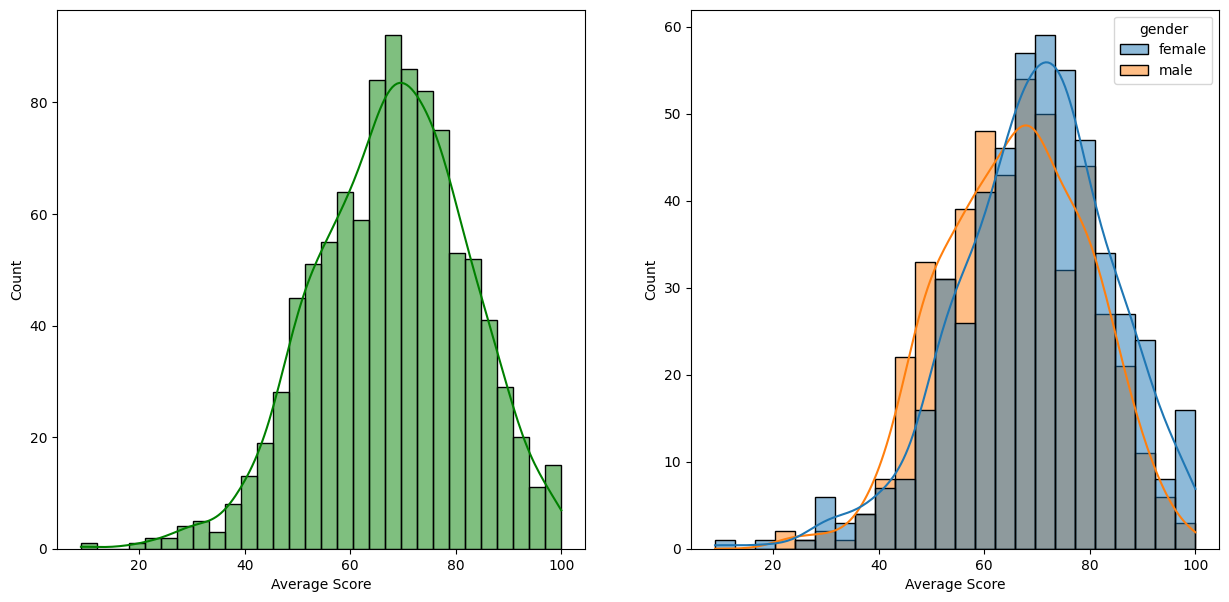

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1
sns.histplot(data = df, x = 'average_score', bins = 30, kde = True, color = 'g', ax = axes[0])
axes[0].set_xlabel("Average Score")

# Plot 2
plt.subplot(122)
sns.histplot(data = df, x = 'average_score', kde = True, hue = 'gender', ax=axes[1])
axes[1].set_xlabel("Average Score")

plt.show() 

##### Lunch

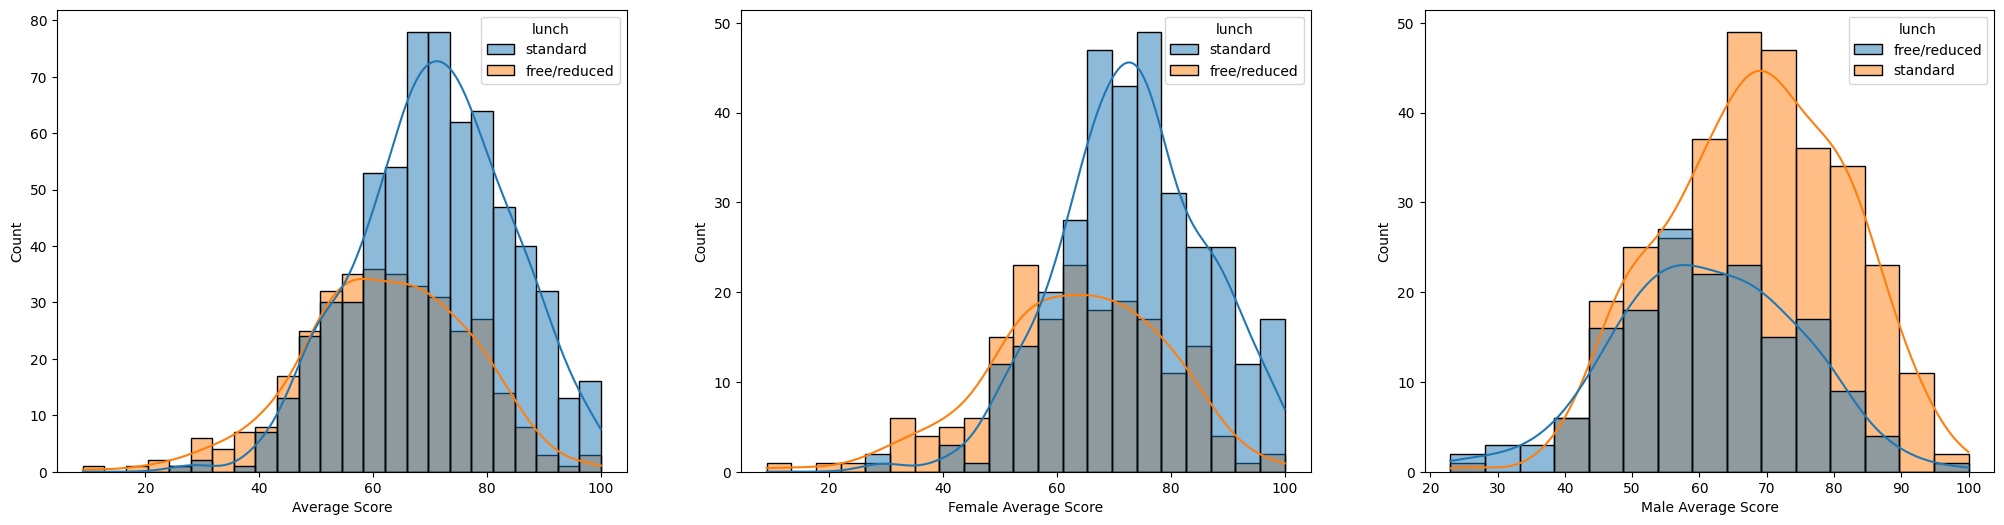

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# First subplot
sns.histplot(data=df, x='average_score', kde=True, hue='lunch', ax=axes[0])
axes[0].set_xlabel("Average Score")

# Second subplot
sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='lunch', ax=axes[1])
axes[1].set_xlabel("Female Average Score")

# Third subplot
sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='lunch', ax=axes[2])
axes[2].set_xlabel("Male Average Score")

plt.show()


##### Parental level of education

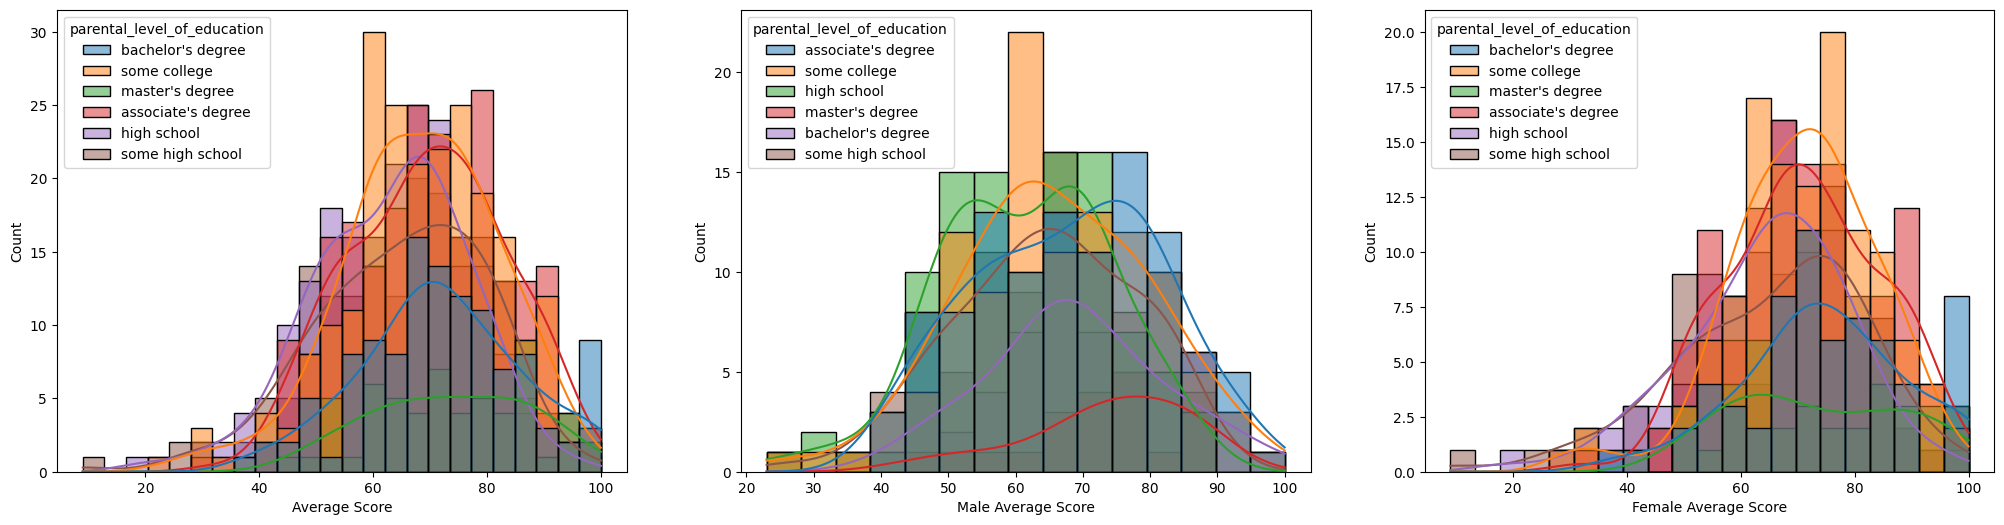

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# First subplot
ax = sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education', ax=axes[0])
ax.set_xlabel("Average Score")

# Second subplot
ax = sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='parental_level_of_education', ax=axes[1])
ax.set_xlabel("Male Average Score")

# Third subplot
ax = sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='parental_level_of_education', ax=axes[2])
ax.set_xlabel("Female Average Score")

plt.show()


##### Race/Ethnicity

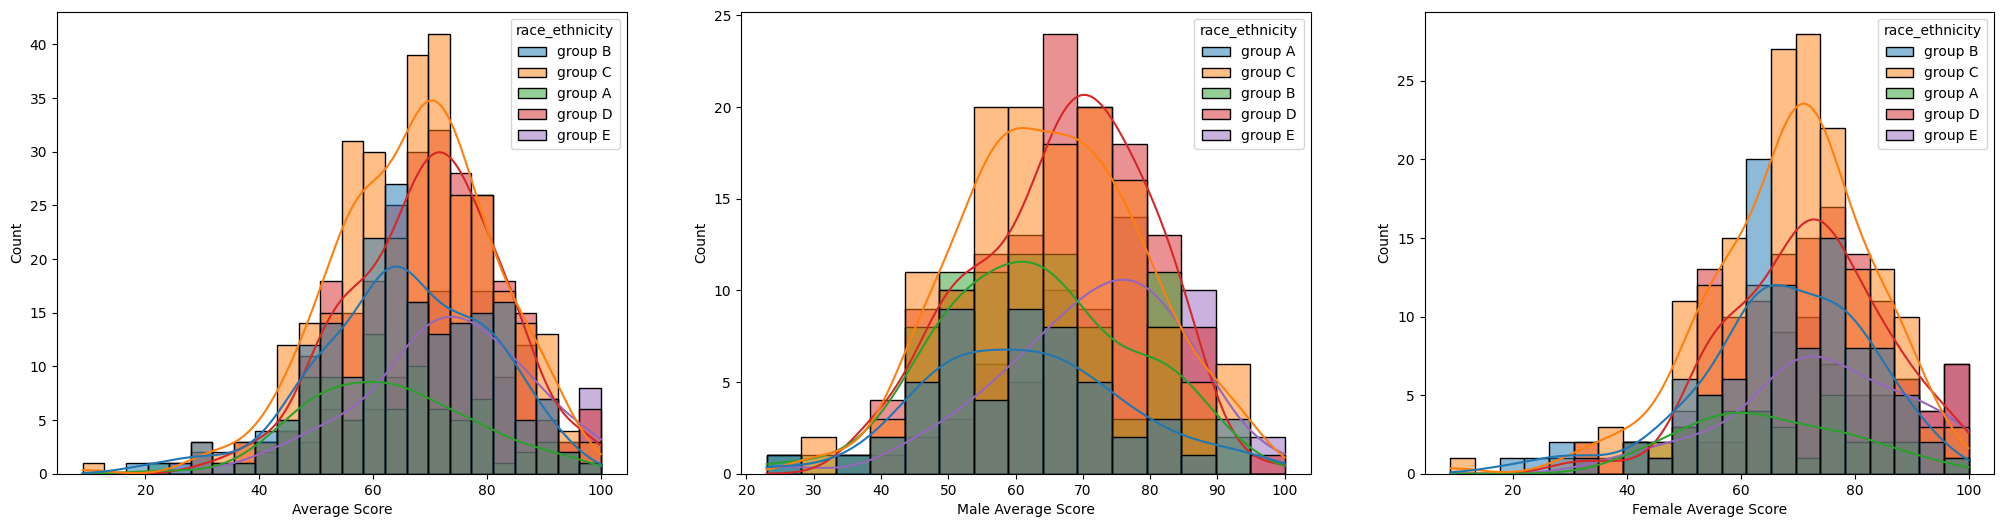

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# First subplot
ax = sns.histplot(data=df, x='average_score', kde=True, hue='race_ethnicity', ax=axes[0])
ax.set_xlabel("Average Score")

# Second subplot
ax = sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='race_ethnicity', ax=axes[1])
ax.set_xlabel("Male Average Score")

# Third subplot
ax = sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='race_ethnicity', ax=axes[2])
ax.set_xlabel("Female Average Score")

plt.show()


#### 4.2.2 Maximum score distribution of each subject

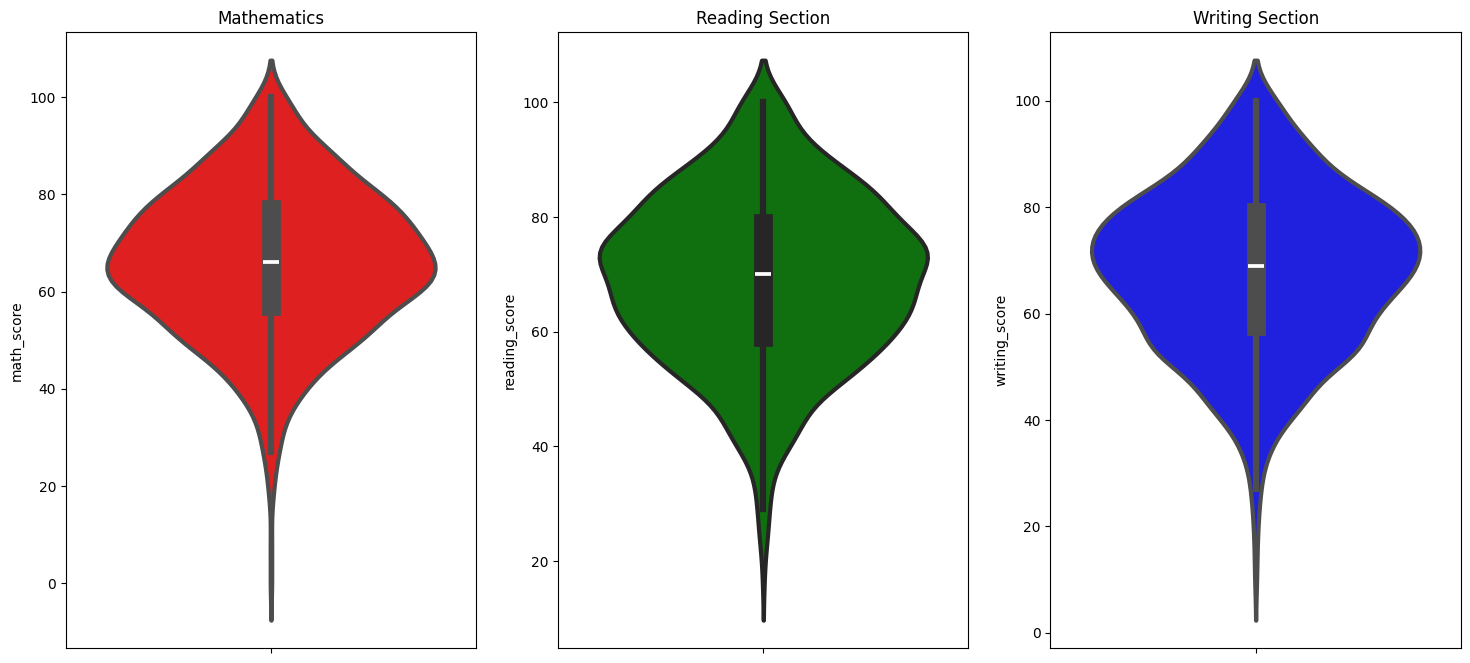

In [15]:
plt.figure(figsize=(18,8))

plt.subplot(1, 3, 1)
plt.title('Mathematics')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)

plt.subplot(1, 3, 2)
plt.title('Reading Section')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)

plt.subplot(1, 3, 3)
plt.title('Writing Section')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### 4.2.3 Multivariate Analysis (Pie Plot Comparision)

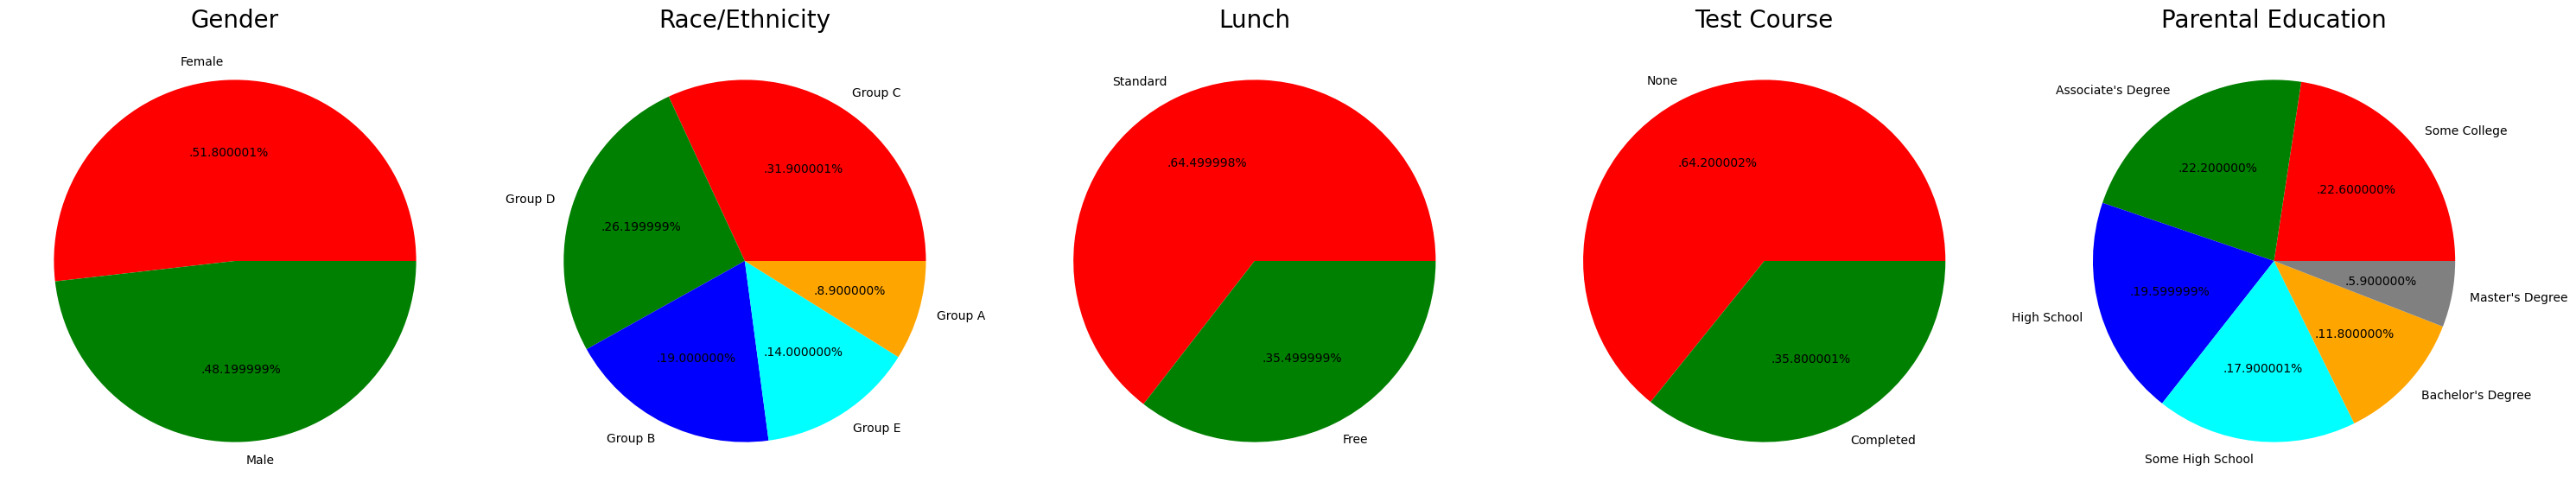

In [16]:
plt.rcParams['figure.figsize'] = (30, 12)

# Plot 1
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

# Plot 2
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

# Plot 3
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

# Plot 4
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

# Plot 5
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

#### 4.2.4 Feature-Wise Visualisation

##### Gender

What is distribution of gender? (Univariate Analysis)

Does gender have any impact on student's performance? (Bivariate Analysis)